In [1]:
import sys, os, warnings
from os import listdir

path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)) :
    sys.path.append(path2add)

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split

from model_utils import arima_baseline_model
from model_utils import arima_parameter_estimation

sns.set_palette("crest")

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [2]:
all_paths = []
fol_name = r"C:\Users\angel\Desktop\Data Analysis\Ironhack\Final Bootcamp Project\Smart-Home-Energy-Consumption-Project\data"
for e in os.listdir(fol_name):
    full = os.path.join(fol_name, e)
    if os.path.isfile(full):
        all_paths.append(full)

data = pd.concat(pd.read_csv(f, low_memory=False) for f in all_paths)
data["time"] = pd.to_datetime(data["time"])
data = data.set_index('time').drop(columns="Unnamed: 0", axis=1)
display(data.head())

,use,gen,dishwasher,home office,fridge,wine cellar,garage door,barn,well,microwave,living room,temperature,humidity,visibility,apparenttemperature,pressure,windspeed,cloudcover,windbearing,precipintensity,dewpoint,precipprobability,furnace,kitchen,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.082617,0.000567,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.084533,0.000567,1,1,Friday,5,1
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.083017,0.000617,1,1,Friday,5,2
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.175417,0.000650,1,1,Friday,5,3
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.300917,0.000783,1,1,Friday,5,4


### **Univariable Time-Series Prediction**

##### *Baseline model*

In [3]:
use_data = data["use"].resample("D").mean()
train_data, test_data = train_test_split(use_data, test_size=0.25, shuffle=False)

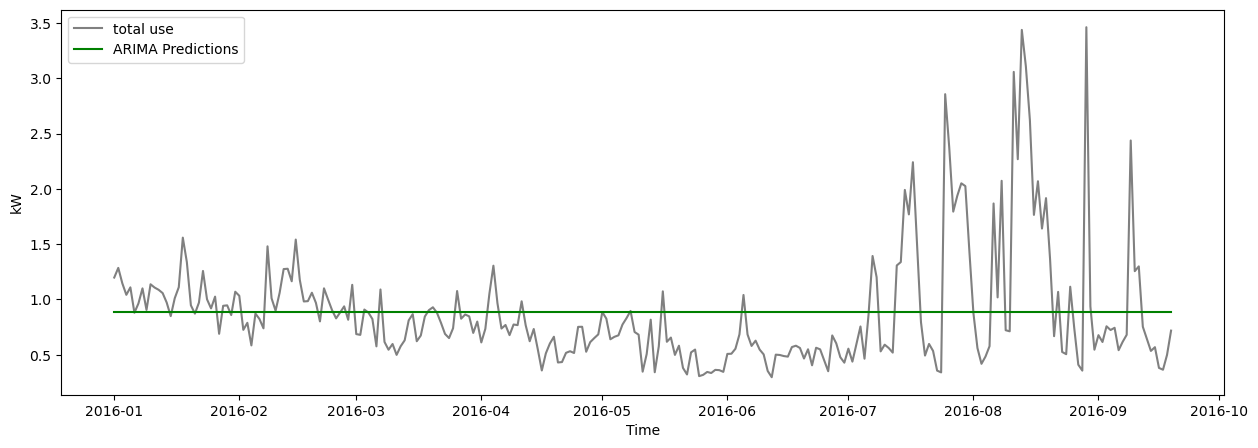

,MAE,MAPE,MSE,RMSE,R^2
0,0.356512,0.462701,0.278771,0.527988,-8.984480e-11


In [4]:
arima_baseline_model(train_data, order=(0,0,0))

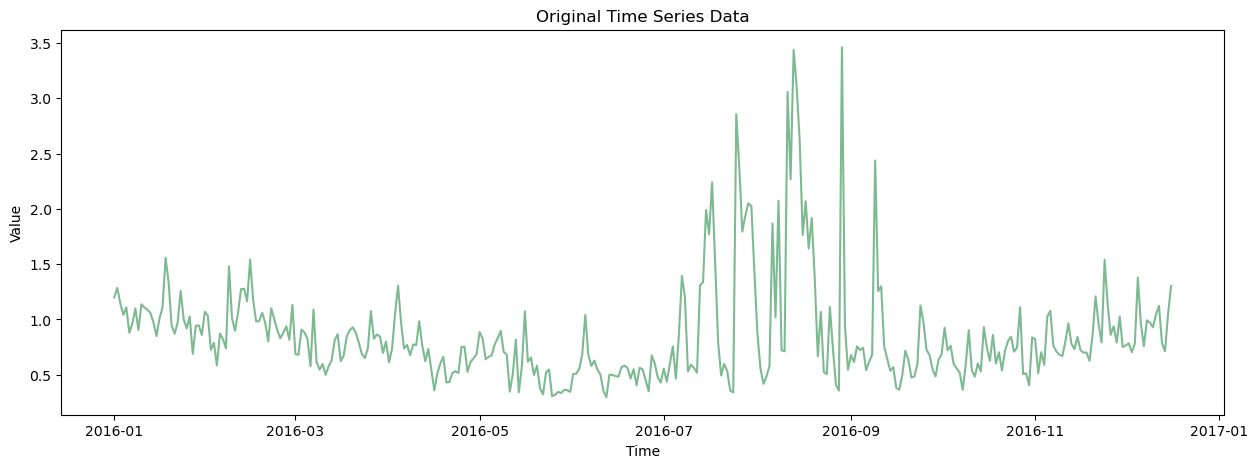

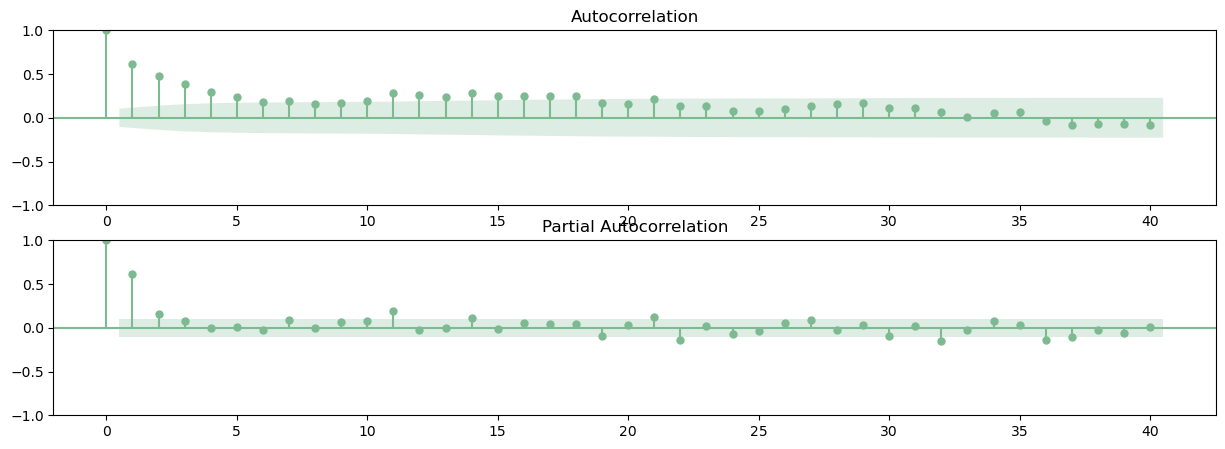

,ADF Statistic,p-value,Critical Values
0,-2.988003,0.03603,"{'1%': -3.4497304638968043, '5%': -2.870078527..."


In [5]:
arima_parameter_estimation(use_data)

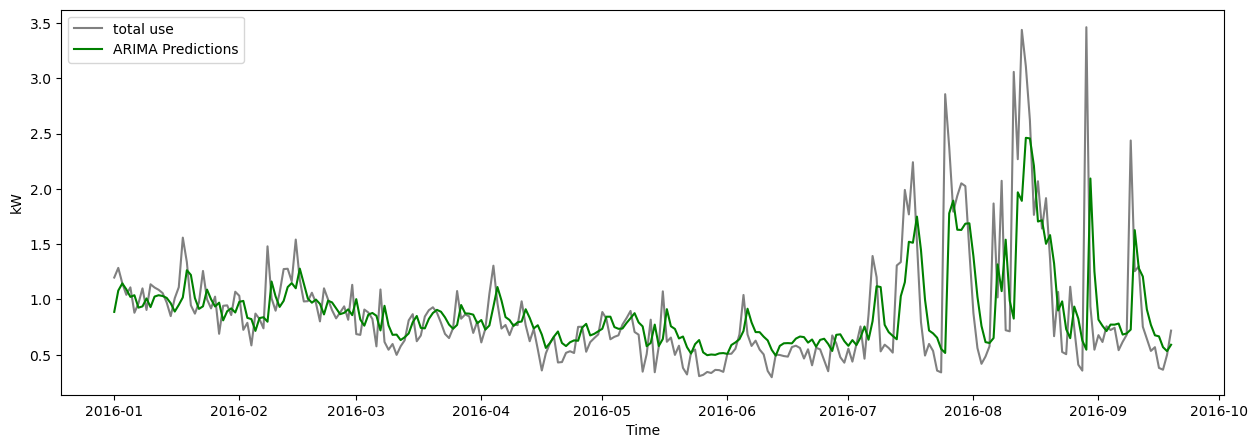

,MAE,MAPE,MSE,RMSE,R^2
0,0.232553,0.276578,0.165525,0.406848,0.406231


In [15]:
arima_baseline_model(train_data, order=(1,0,1))

In [7]:
# auto_arima = auto_arima(train_data, start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5,
                        # start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, 
                        # seasonal=True, trace=True,stepwise=True)

### **Multivariable Time-Series Prediction**

### **Feature Engineering**